# Modelling Design Report Performance based on Nephrotex Virtual Internship Chat Data 

## Background 

The goal of this project is to model students final design report performance (a final score) based on chat data from their virtual internship at Nephrotex. 

**[Nephrotex](https://www.virtualinterns.org/nephrotex/)** is a virtual internship in which students play the role of interns in a fictitious biomedical engineering design firm. They are required to design a novel nanotechnology-based membrane that can be used for kidney dialysis. To do this they use internal technical documents, background research, and research reports based on experimental data. The students have to develop and test hypotheses, as well as appeal to company stakeholders who have a stake in the outcome of the devices that they develop. 

This chat data is collected from the chat features of an online platform that the students have used to complete the virtual internship. This platform is called WorkPro. This allows virtual communication between teammates and the design advisor (mentor). 


We will be looking to achieve our goal by looking at different variables related to design moves and design justifications, along with how language used in the chat can effect a students final score. We aim to find correlations to determine which 3 factor's can best predict a student's final score (A mark between 0 and 8, where 0 is low quality and 8 is high quality.)

### Description of room names

Each room name represents the phases of a team's project. A brief description of each of them is given below in the chronological order of the project's workflow.

Introduction and Workflow Tutorial with Entrance Interview: This room serves as an induction for interns and allows both mentors and interns get to know each other

Background research on dialysis: This room's purpose is for interns to discuss the optimal existing treatments for patients' kidneys so that the team's product can be inspired by these ideas for treating kidney failure. Dialysis describes the treatment used to act as a replacement for a patient's kidneys with regards to functioning, in the event of kidney failure. 

Choose consultants to analyze: This room enables interns to discuss which external advisors are the most effective at conveying information about patients' condition with regards to their physiological state, so that their products can best meet patients' needs.

Summarize internal consultant requirements: This room enables interns to discuss how they can satisfy patients' needs based on the advice they have been given by the consultants they had previously chosen

Graphing Surfactant Data:  This room's purpose is to visualise the effects of different types of surfactants on patients' kidneys. The general role of a surfactant is to reduce the surface tension of blood vessels in the lungs and kidneys so that pathogenic fluids and waste can be removed from the body. 

Reflection team discussion of surfactants: This room allows the team to discuss the results of the surfactants' effecitveness in improving kidney function. 

Individuals design 5 prototypes: This room serves as an ideation space for individuals to brainstorm potential ideas. By the end of this phase, individuals are required to realise at least 5 ideas in the form of prototype designation.

Individual analysis of first batch: Individuals analyse and reflect upon the advantages and disadvantages of the their prototypes.

Team designs batch using 1 material: This room contains the team's final design to be submitted as part of the first round of designs for Nephrotex. 

Reflection team discussion of first batch results: This room allows the team to discuss the effectiveness of their prototype submission and how to improve in later attempts. 

## Exploratory Data Analysis

In [3]:
# Import all required libraries 

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate, RepeatedKFold
RS=42 #DO NOT CHANGE. This is the random state for the whole notebook

In [4]:
chatData = pd.read_csv('virtualInternshipData_ADS2001.csv',encoding='latin1')

In [5]:
chatData.head()

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,3,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,4,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,5,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39


In [6]:
# Explore the data types of all our columns

chatData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19180 entries, 0 to 19179
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Unnamed: 0                             19180 non-null  int64 
 1   userIDs                                19180 non-null  int64 
 2   implementation                         19180 non-null  object
 3   Line_ID                                19180 non-null  int64 
 4   ChatGroup                              19180 non-null  object
 5   content                                19180 non-null  object
 6   group_id                               19180 non-null  int64 
 7   RoleName                               19177 non-null  object
 8   roomName                               19180 non-null  object
 9   m_experimental_testing                 19180 non-null  int64 
 10  m_making_design_choices                19180 non-null  int64 
 11  m_asking_questi

In [7]:
# Examine dimensionality of the raw data

print(chatData.shape)

(19180, 17)


In [8]:
# Any missing values? If yes -> must delete or impute

chatData.isnull().sum()

Unnamed: 0                               0
userIDs                                  0
implementation                           0
Line_ID                                  0
ChatGroup                                0
content                                  0
group_id                                 0
RoleName                                 3
roomName                                 0
m_experimental_testing                   0
m_making_design_choices                  0
m_asking_questions                       0
j_customer_consultants_requests          0
j_performance_parameters_requirements    0
j_communication                          0
OutcomeScore                             0
wordCount                                0
dtype: int64

### Variables in the Nephrotex Dataset:

The dataset contains the chat records from 15 implementations of Nephrotex. They are labelled with the presence and absence of various concepts in engineering discourse relating to design moves and design justifications. We want to model a students perfomance on the report based on what they have discussed within the chat throughout the internship. 

- `UserIDs` = a unique id for each student
- `implementation` = id for each implementation of nephrotex (there were 15 implementations)
- `Line_ID` = unique Id for the chat utterance
- `ChatGroup` = id for the team the chatter was in. (String values are the teams from the first half of the internship, numeric are the teams from the second part of the intership - interns swapped teams halfway through) 
- `content` = content of the chat utterance
- `group_id` = numerical id for the team the chatter was in
- `RoleName` = Chatter was a **Mentor** or **Player** 
- `roomName` = the internship activity that the chatter was participating in
- `OutcomeScore`  = A mark from 0 -> 8 indicating quality of the chatter's final design report. (Not everyone in the same group got the same score)
-  `wordCount`  = no. of words in chat content

Design <u>Moves</u> (Dummy Variables)
- `m_experimental_testing` = talks about using experimental techniques to understand the technical features of the design 
- `m_making_design_choices` = talks about choosing a specification or characteristic for a design. 
- `m_asking_questions` = asks a question

Design <u>justifications</u> (Dummy Variables)
- `j_customer_consultants_requests` = states whether they should meet or exceed stakeholder requests
- `j_performance_parameters_requirements`  = refers to performance parameters or experimental results
- `j_communication`  = refers to how it can facilitate communication among the engineers



In [9]:
# Descriptive Statistics 

stats=chatData.describe().round(4)
stats

,Unnamed: 0,userIDs,Line_ID,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
count,19180.0000,19180.0000,19180.0000,19180.0000,19180.0000,19180.0000,19180.0000,19180.0000,19180.0000,19180.0000,19180.0000,19180.0000
mean,9590.5000,202.4332,9592.7938,3.9167,0.0287,0.1029,0.1870,0.0181,0.0522,0.0211,3.7416,12.4895
std,5536.9334,118.3552,5537.8007,1.3979,0.1670,0.3038,0.3899,0.1335,0.2225,0.1436,1.4648,14.1172
min,1.0000,1.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,4795.7500,96.0000,4796.7500,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,4.0000
50%,9590.5000,204.0000,9593.5000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,9.0000
75%,14385.2500,317.0000,14388.2500,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,17.0000
max,19180.0000,393.0000,19183.0000,6.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,8.0000,1032.0000


### Visualisation

In [10]:
quantitative_feats=chatData.drop(['userIDs','Line_ID','implementation','roomName','content','ChatGroup'],axis=1)
processed_quantitative=pd.get_dummies(quantitative_feats, prefix=['RoleName'], columns=['RoleName'])
processed_quantitative=processed_quantitative.drop(['RoleName_Mentor','RoleName_Player'],axis=1)
normalised_processed=(processed_quantitative-processed_quantitative.mean())/processed_quantitative.std()
teams=processed_quantitative.groupby('group_id')
group2=teams.get_group(2).drop(['group_id'],axis=1).drop(['wordCount','OutcomeScore'],axis=1)
group3=teams.get_group(3).drop(['group_id'],axis=1).drop(['wordCount','OutcomeScore'],axis=1)
group4=teams.get_group(4).drop(['group_id'],axis=1).drop(['wordCount','OutcomeScore'],axis=1)
group5=teams.get_group(5).drop(['group_id'],axis=1).drop(['wordCount','OutcomeScore'],axis=1)
group6=teams.get_group(6).drop(['group_id'],axis=1).drop(['wordCount','OutcomeScore'],axis=1)

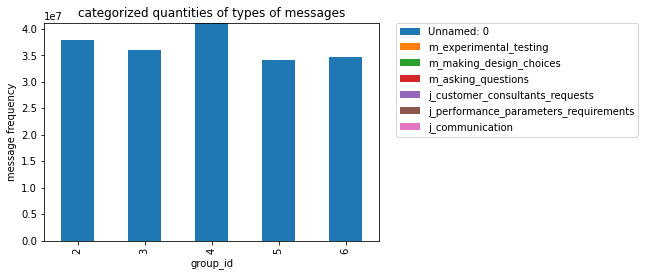

In [11]:
stats_2=pd.DataFrame(group2.sum()).transpose()
stats_3=pd.DataFrame(group3.sum()).transpose()
stats_4=pd.DataFrame(group4.sum()).transpose()
stats_5=pd.DataFrame(group5.sum()).transpose()
stats_6=pd.DataFrame(group6.sum()).transpose()
all_stats=pd.concat([stats_2,stats_3,stats_4,stats_5,stats_6])
group_id=[2,3,4,5,6]
all_stats['group_id']=group_id
all_stats.plot(x='group_id',kind='bar',stacked=True,title='categorized quantities of types of messages')
plt.ylabel('message frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

As observed, the proportion of types of messages being sent by each group is similar. This may lead to the conclusion that the quantity of types of messages being sent may not be a significant differentiator between the performance of each group. Rather, the nature of questions being asked may have a greater impact on the outcome of each team's project.

First, we analyse the data at quantitative level to find pre-existing trends before implementing more complex methods. Analysing at a quantitative level enables the use of regression models and statistical correlation tools

In [12]:
def plt_correlation_matrix(corrs):
    '''Uses the seaborn heatmap to plot the correlation matrix of a pandas dataframe''' 
    # as this is a symmetric table, set up a mask so that we only plot values 
    # below the main diagonal
    mask = np.triu(np.ones_like(corrs, dtype=np.bool))
    f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
    # plot the correlations as a seaborn heatmap, with a colourbar
    sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
    # do some fiddling so that the top and bottom are not obscured
    bottom, top = ax.get_ylim() 
    ax.set_ylim(bottom + 0.5, top - 0.5)

/var/folders/8s/9tq1cw9n5p9ctt215htgjcw40000gn/T/ipykernel_36692/2398561421.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrs, dtype=np.bool))


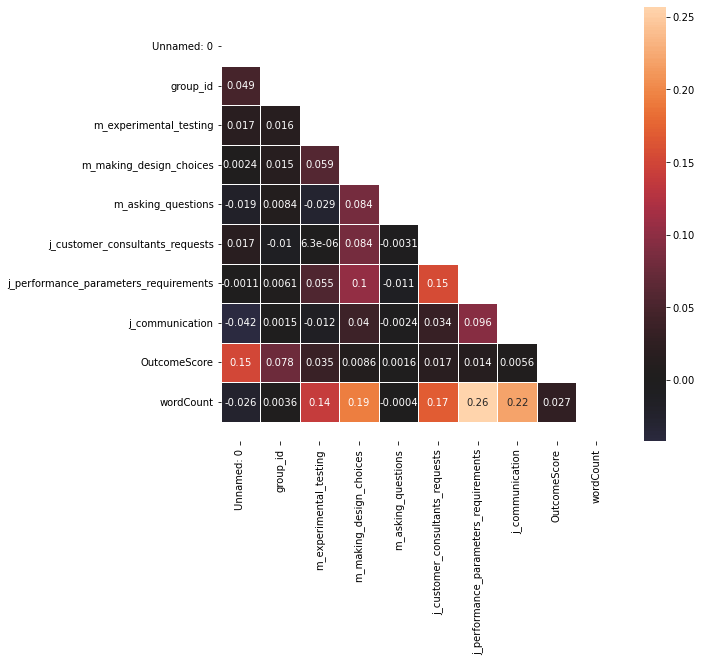

In [13]:
plt_correlation_matrix(normalised_processed.corr())

At a glance, we can see that wordCount has a low correlation with outcome score which could suggest that it does not affect outcome score. However, this is insufficient evidence because other factors such as m_making_design_choices, seemingly have a lower correlation to score than wordCount. Hence, another approach that could be used in the form of a feature importance visualisation.

In [14]:
X=processed_quantitative.drop(['OutcomeScore','group_id'],axis=1)
nX=preprocessing.normalize(X)
y=processed_quantitative['OutcomeScore']
X_train, X_test, Y_train, Y_test = train_test_split(nX, y, test_size=0.2,random_state=np.random.RandomState(RS))#80/20 split

In [27]:
print(nX)

[[1.96116135e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.80580676e-01]
 [1.78885438e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.83869910e-01]
 [3.16227766e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.48683298e-01]
 ...
 [9.99999890e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.69287674e-04]
 [9.99999999e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21403618e-05]
 [9.99999836e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.73513983e-04]]


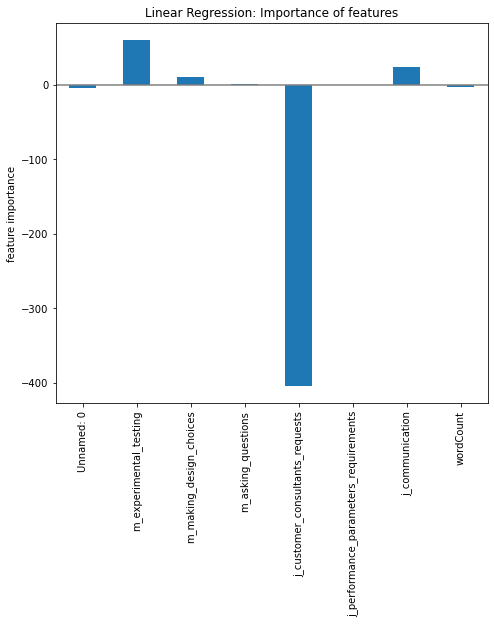

In [16]:
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)
feature_names = X.columns.tolist()
coefficients = pd.Series(data=linear.coef_.transpose(), index=feature_names)
coefficients.plot(kind='bar', figsize=(10, 7)) # plot these as a bar plot
plt.title('Linear Regression: Importance of features') 
plt.ylabel('feature importance')
plt.axhline(y=0, color='.5') #
plt.subplots_adjust(left=.3) 

## Predictive modelling

### Multivariate Linear Regression

The first model used will be multivariate linear regression. The goal of this model is to find the top quantitative factors that affect the outcome score of the work produced by each team. 

In [17]:
linear = LinearRegression()
linear.fit(X_train,Y_train)
training_predictions = linear.predict(X_train)
testing_predictions = linear.predict(X_test) 
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
})

,R^2,RMSE,MAE
train,0.001135,1.464206,1.090675
test,-0.009374,1.470670,1.092928


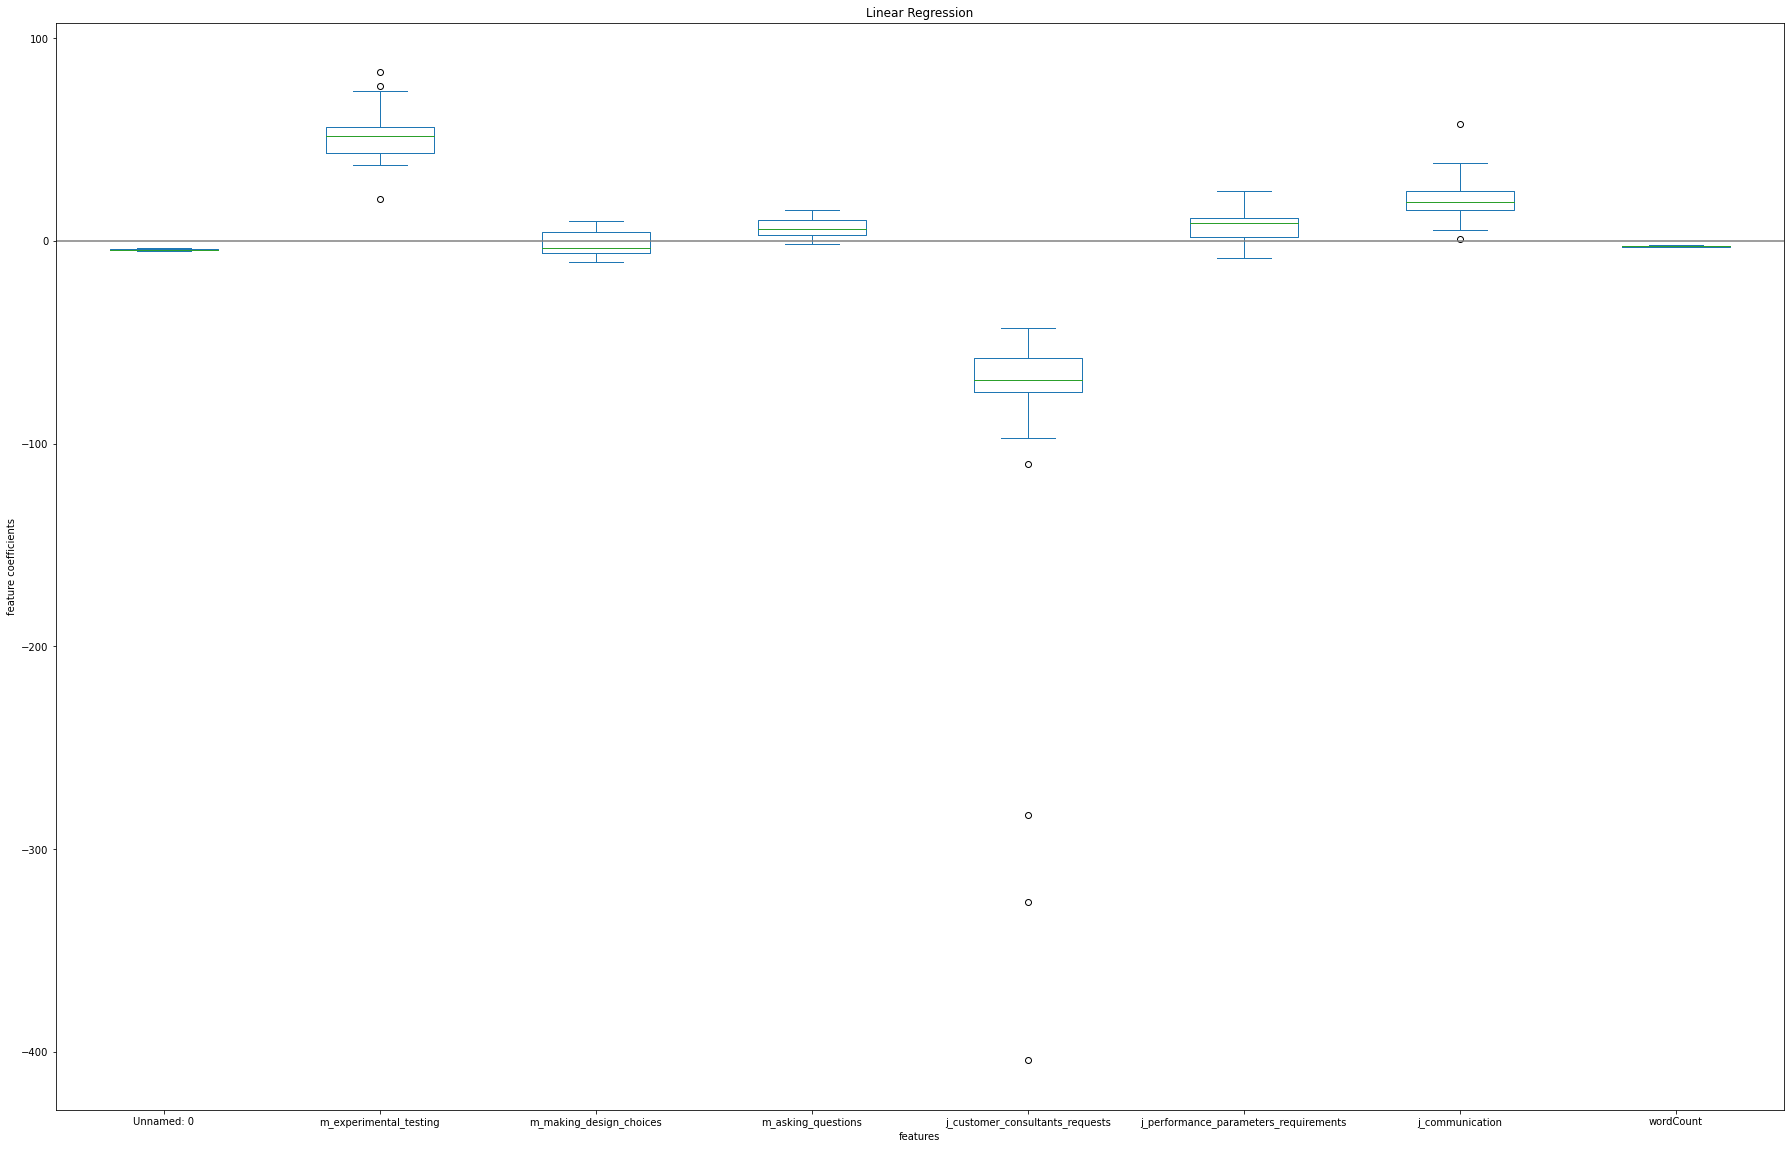

In [18]:
scores = cross_validate(
    linear, nX, y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(RS)),
    return_estimator=True,
)
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']], columns=feature_names)
ax = coefs.plot(kind='box',figsize=(30,20))
plt.title('Linear Regression')
plt.xlabel('features')
plt.ylabel('feature coefficients')
plt.axhline(y=0, color='.5')
plt.subplots_adjust(left=.1)

As observed, the most significant factors increasing outcome score are experimental testing and customer consultant requests. Moderate factors that increase score slightly are the performance_parameter_requirements and word count. All other observed factors are observed to have a slightly negative impact on outcome score. However, the biggest shortcoming of the model is that the data is technically not continous although it could be interpreted in such a way. Therefore, further investigation is required to produce a sensible insight.

The next most appropriate choice would be using a classifier model such as a support vector machine. Find the optimal parameters fitted to the training set

### Support Vector Machine Classifier

In [19]:
def plt_decision_boundaries(skm,X):
    """
    Takes a sklearn model (skm) with two features specified by the (N,2) array X and plots the decision boundaries.
    """
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # find the minimum and maximum of the first feature
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # find the minimum and maximum of the second feature
    # create a rectangular grid which goes from the minimum to maximum values in step-size of h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) 
    # ravel is a numpy method which converts a two-dimensional array of size (n,m) to a vector of length nm
    # column_stack is a numpy function which takes two column arrays of length N 
    # and creates a two-dimensional array of size (N,2)
    # now pass the (N,2) array to the model and predict values based on these features, zz will have size (N,1)
    zz = skm.predict(np.column_stack([xx.ravel(), yy.ravel()]))  
    zz = zz.reshape(xx.shape) # reshape zz so it has the size of the original array xx, i.e., (n,m)
    plt.contourf(xx, yy, zz, cmap=plt.cm.Paired) # plot the decision boundaries as filled contours

In [20]:
svc=SVC(kernel='poly',coef0=10,C=10)
X=all_stats.drop(["group_id"],axis=1)
teams.get_group(5).drop(['wordCount'],axis=1)

,Unnamed: 0,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore
880,881,5,0,0,0,0,0,0,4
881,882,5,0,0,0,0,0,0,4
882,883,5,0,0,0,0,0,0,4
883,884,5,0,0,0,1,0,0,4
884,885,5,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18856,18857,5,0,0,0,0,0,0,4
18857,18858,5,0,0,0,0,0,0,4
18858,18859,5,0,0,1,0,0,0,5
18859,18860,5,0,0,0,0,0,0,4


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11833631-a9cf-4189-bb5a-7b842801381e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>